# Mean Variance Optimization

I am  an investment analyst at a large fund. I specialize in calculating efficient frontiers and selecting assets for portfolios.

In this project, I will do the following:
1. Follow the steps to calculate the efficient frontier of a portfolio with five assets.
2. See how two additional assets affect the efficient frontier.
3. Use the covariance matrix and expected returns from ten assets to select the five assets that produce the best efficient frontier.

## Calculate the Efficient Frontier of a Portfolio

1. Load **stock_data_weak.csv** as a DataFrame and save it to a variable called `stock_data`.

   Use `print(stock_data)` to visualize the data.

In [3]:
# 1. CSV file uploading
stock_data = pd.read_csv("stock_data_weak.csv")

# 2. daily and monthly stock returns 
# 'selected' değişkeni tüm varlıkların kolonlarını alıyor (ilk kolon tarih olabilir)
selected = list(stock_data.columns[1:])  
returns = stock_data[selected].pct_change().dropna()  # yüzdelik değişim ve NaN satırlarını çıkar

# 3. mean  ve kovaryans matrix  
mean_returns = returns.mean()  # Her hissenin ortalama getirisi
cov_matrix = returns.cov()     # Varlıklar arası kovaryans matrisi


print("Mean Returns:\n", mean_returns)
print("\nCovariance Matrix:\n", cov_matrix)

Mean Returns:
 General Electric    -0.012048
Chesapeake Energy   -0.030608
AT&T                -0.001464
Cisco Systems        0.018479
Campbell Soup        0.008469
dtype: float64

Covariance Matrix:
                    General Electric  Chesapeake Energy      AT&T  \
General Electric           0.026007           0.010742  0.007080   
Chesapeake Energy          0.010742           0.056647  0.002392   
AT&T                       0.007080           0.002392  0.006458   
Cisco Systems              0.006391           0.006528  0.000735   
Campbell Soup              0.007467           0.001770  0.002638   

                   Cisco Systems  Campbell Soup  
General Electric        0.006391       0.007467  
Chesapeake Energy       0.006528       0.001770  
AT&T                    0.000735       0.002638  
Cisco Systems           0.012877       0.002787  
Campbell Soup           0.002787       0.008942  


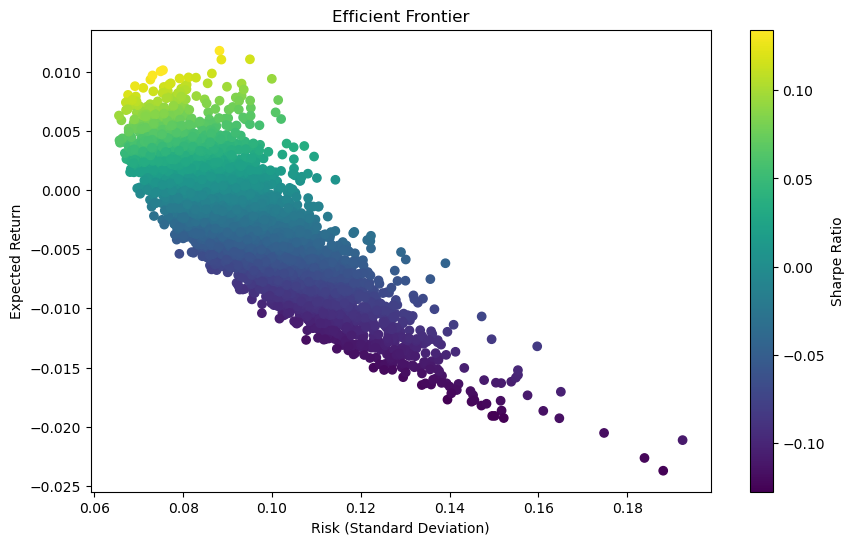

In [4]:
import matplotlib.pyplot as plt

# Portfoy simulation 
num_portfolios = 5000  # oluşturulacak portföy sayısı
num_assets = len(mean_returns)

# save into resukts
results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    # random weights
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    # Portfoy risks
    portfolio_return = np.sum(weights * mean_returns)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    # keep results
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std
    results[2,i] = results[0,i] / results[1,i]  # Sharpe Ratio (risk başına getiri)

# visualisation
plt.figure(figsize=(10,6))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis', marker='o')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.colorbar(label='Sharpe Ratio')
plt.show()


5. We've provided the function `return_portfolios()` below. The function accepts the expected return and quarterly covariance of a set of asset and returns a random collection of 5,000 portfolios. The return is formatted as a DataFrame with columns: `'Volatility'` and `'Returns'`.

   Use the expected returns and covariances to find a set of random portfolios. Save the result to `random_portfolios`.

7. We've provided the function `optimal_portfolio()` below. This function accepts the quarterly returns of a set of assets. The function returns the `weights`, `returns`, and `risks` of portfolios on the efficient frontiers. The returns are formatted as NumPy arrays.

   Use the `optimal_portfolio()` function to calculate the `weights`, `returns`, and `risks` of portfolios on the efficient frontier.

**if you don't have cvxopt installed, uncomment the next cell.** The % is a way to create a cell that behaves like a teminal.

11. It's hard to visualize how much the efficient frontier improved with these assets. Let's plot the original frontier on the same figure. Use the following code to do this:

    ```py
    weak_EF = pd.read_csv('weak_risks_returns.csv')
    plt.plot(weak_EF['Risks'], weak_EF['Returns'], 'g-o')
    ```
    
    To get a better view of the efficient frontier, you may want to comment out the following line:
    
    ```py
    random_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize=12)
    ```
    
    By adding the two high-return assets, we increased the expected return of portfolios on the efficient frontier.

12. If you look at the expected returns of assets in your portfolio, you'll notice that General Electric and Chesapeake Energy have a large negative return (i.e. you expect to lose money).

    Asset | Expected Return
    --- | ---
    General Electric | -0.0120
    Chesapeake Energy | -0.0306
    AT&T | -0.0014
    Cisco Systems | 0.0184
    Campbell Soup | 0.0084
    Bank of America | 0.0341
    Marvel | 0.0369
    
    This begs the question: do we need these assets in our portfolio? Given their poor expected return, we should only keep them if they are uniquely uncorrelated to the rest of the assets in the portfolio.
    
    To check the effects of these assets, we calculated the efficient frontier for a portfolio **without** General Electric and Chesapeake Energy. Add the following code to the code block below to visualize this efficient frontier on the same plot.
    
    ```py
    strong_EF = pd.read_csv('strong_risks_returns.csv')
    plt.plot(strong_EF['Risks'], strong_EF['Returns'], 'k-x')
    ```
    
    What do you notice when you run the code?

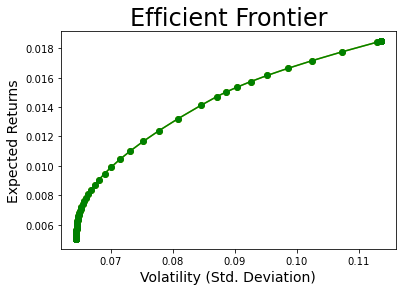

In [15]:
# 12. Plot Efficient Frontier Without Two Assets
plt.plot(risks, returns, 'y-o')
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier', fontsize=24)
weak_EF = pd.read_csv('weak_risks_returns.csv')
plt.plot(weak_EF['Risks'], weak_EF['Returns'], 'g-o')


## Finding the Best Efficient Frontier

13. Next, you will use your understanding of expected returns and covariances to inform portfolio decisions. We have asset data for 10 stocks, stored in **stock_data3.csv**.

    View the output from the code block below.
    
    You should see two efficient frontiers. We calculate the better efficient frontier (green dots) using all ten assets. We calculate the other efficient frontier using only five assets from the portfolio.
    
    Your job is to choose five assets from the following list to create the best efficient frontier.
    
    ```
    ['PFE', 'TGT', 'M', 'VZ', 'JPM', 'MRO', 'KO', 'PG', 'CVS', 'HPQ']
    ```
    
    Use the expected returns and covariance table, and set the `selected` variable equal to a list with five of these assets.

PFE    0.015530
TGT    0.014783
M      0.021962
VZ     0.004856
JPM    0.034781
MRO   -0.008010
KO    -0.002050
PG     0.004132
CVS    0.016124
HPQ   -0.000237
dtype: float64
          PFE       TGT         M        VZ       JPM       MRO        KO  \
PFE  0.010005  0.001738  0.005978  0.004071  0.007016  0.009721  0.002086   
TGT  0.001738  0.012874  0.015762  0.002188  0.007805  0.002239  0.002534   
M    0.005978  0.015762  0.038909  0.002804  0.016439  0.015110  0.005189   
VZ   0.004071  0.002188  0.002804  0.006958 -0.000407  0.005276  0.002586   
JPM  0.007016  0.007805  0.016439 -0.000407  0.023837  0.013848  0.002979   
MRO  0.009721  0.002239  0.015110  0.005276  0.013848  0.043166 -0.001516   
KO   0.002086  0.002534  0.005189  0.002586  0.002979 -0.001516  0.011021   
PG   0.004297  0.003148  0.005853  0.002094  0.006364  0.002834  0.001255   
CVS  0.004300  0.005384  0.012501  0.002052  0.005041  0.003689  0.003223   
HPQ  0.006996  0.007774  0.018937  0.003076  0.011523  

 3:  1.1536e-01  1.1470e-01  7e-04  2e-16  6e-17
 4:  1.1525e-01  1.1520e-01  5e-05  2e-16  6e-17
 5:  1.1524e-01  1.1523e-01  7e-06  6e-17  4e-17
 6:  1.1523e-01  1.1523e-01  6e-07  6e-17  4e-17
 7:  1.1523e-01  1.1523e-01  8e-09  7e-17  7e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.5955e-01 -9.3724e-01  1e+00  6e-17  3e+00
 1:  1.4614e-01  7.3167e-02  7e-02  2e-16  2e-01
 2:  1.3105e-01  1.2237e-01  9e-03  2e-16  8e-17
 3:  1.2978e-01  1.2918e-01  6e-04  6e-17  4e-17
 4:  1.2967e-01  1.2962e-01  5e-05  1e-16  7e-17
 5:  1.2966e-01  1.2965e-01  6e-06  6e-17  6e-17
 6:  1.2966e-01  1.2966e-01  4e-07  1e-16  3e-17
 7:  1.2966e-01  1.2966e-01  4e-09  6e-17  6e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.7537e-01 -9.2337e-01  1e+00  3e-16  3e+00
 1:  1.6150e-01  8.8624e-02  7e-02  1e-16  2e-01
 2:  1.4709e-01  1.3892e-01  8e-03  9e-17  1e-16
 3:  1.4594e-01  1.4540e-01  5e-04  2e-16  1e-16
 4:  1.4585e-01  1.4580

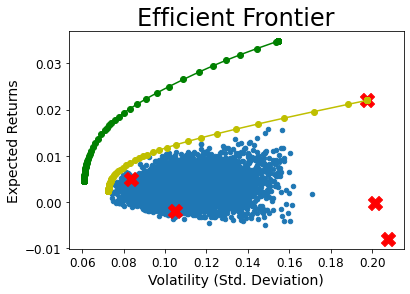

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path='stock_data3.csv'

# 1. Load the stock data
stock_data = pd.read_csv(path)
selected = list(stock_data.columns[1:])
print(stock_data[selected].pct_change().mean())
print(stock_data[selected].pct_change().cov())

#stock_names = ['PFE', 'TGT', 'M', 'VZ', 'JPM', 'MRO', 'KO', 'PG', 'CVS', 'HPQ']
selected = ['KO', 'HPQ', 'M', 'VZ', 'MRO']

# 2. Find the quarterly for each period
returns_quarterly = stock_data[selected].pct_change()

# 3. Find the expected returns 
expected_returns = returns_quarterly.mean()

# 4. Find the covariance 
cov_quarterly = returns_quarterly.cov()

# 5. Find a set of random portfolios
random_portfolios = return_portfolios(expected_returns, cov_quarterly) 

# 6. Plot the set of random portfolios
random_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize=12)

# 7. Calculate the set of portfolios on the EF
weights, returns, risks = optimal_portfolio(returns_quarterly[1:])

# 8. Plot the set of portfolios on the EF
plt.plot(risks, returns, 'y-o')
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier', fontsize=24)

#pd.DataFrame({'Risks': risks, 'Returns': returns}).to_csv('all_ten.csv', index=False)

# 9. Compare the set of portfolios on the EF
single_asset_std=np.sqrt(np.diagonal(cov_quarterly))
plt.scatter(single_asset_std,expected_returns,marker='X',color='red',s=200)

# All 10
all_ten_EF = pd.read_csv('all_ten.csv')
plt.plot(all_ten_EF['Risks'], all_ten_EF['Returns'], 'g-o')
plt.show()